
녹화_2022_05_14_24_65_98_656  [00:00:00]  
NN.PDF [ p.31 ]

---

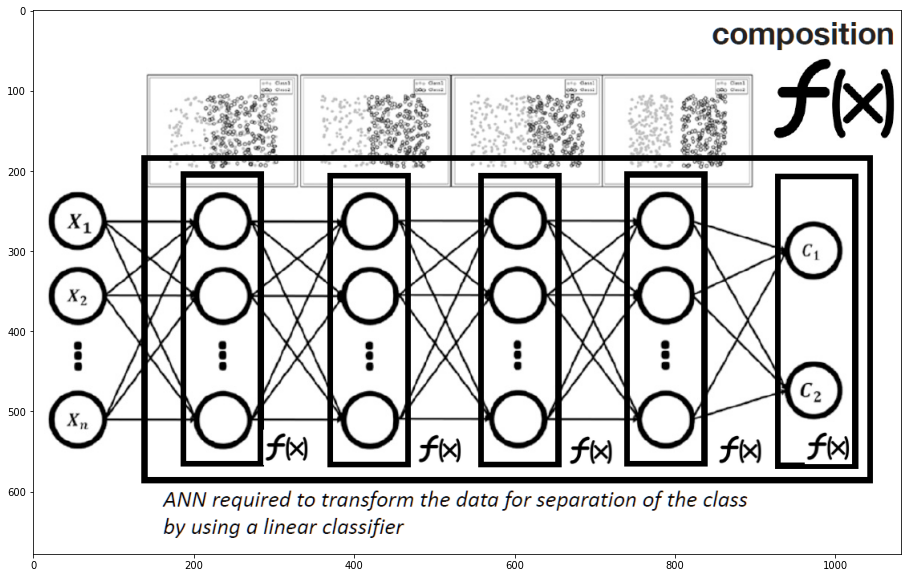

In [29]:
# ANN 선형 분류기 모델 (NN.PDF)
import cv2
import matplotlib.pyplot as plt
im1 = cv2.imread('ANN_map.png')
plt.figure(figsize=(20,10))
plt.imshow(im1)

- X1 값으로 하나 들어가면, 각 f(x) 를 통과하면서, bias 와 weight 가 업데이트 된다. (feed forward)
- f(x) 들은 array 연산이므로 x1, x2, xn 값을 동시에 넣을 수 있다. (일정 수 만큼 동시에 계산 = batch)
- 앞선 레이어들에서 학습을 거치면서 => 다음 레이어에서는 앞선 학습을 조합해서 분류 할 수 있는 능력을 기른다. => 따라서, 레이어가 많으면 많을수록 성능이 좋아진다. ==> 이론 : UAP (Universal Approximation Theorem)

- 하지만 뉴럴네트워크에 이미지 데이터를 바로 집어 넣을 수 없다. = why? 1차원 데이터로 바꿔 주어야 한다. 

---

### 왜 우리는 이미지에 관해서 NN 를 쓰지 안는가?
- 이미지를 1차원으로 바꾸면 NN을 쓸 수 있는데.. 왜?
- CNN_Advanced.pdf

(결론)
- (1) 1차원으로 바꿀 때 locality 를 잃어버린다.
- (2) 필요없는 연산을 많이한다.
- (3) 차원의 저주 (차원이 너무 늘어나 overfitting)

In [12]:
from PIL import Image

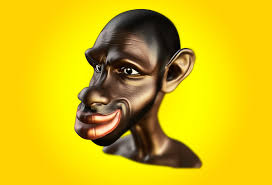

In [14]:
im = Image.open('1.jpg')
im

- 2차원 이상의 이미지는 local 정보를 가지고 있는데, 이를 1차원으로 바꾸게 되면, local 정보를 잊어버린다. 따라서 NN 에 대입하면 성능이 좋을 수 없다.

- 특히 fully connected & Densely Connected 에서 (위 그림과 같이 모두가 연결)는 이미지를 1차원으로 바꾸면서 local 정보를 잊어 버린다.
- 때문에 (일렬로 바뀌어 버림에 따라) 연관이 없는 정보를 관련지어 생각한다. (필요 없는 연산을 많이 하게 된다.)

In [15]:
import numpy as np
np.array(im).shape

(185, 272, 3)

이미지 관점에서 보면  

차원의 저주
- 이미지가 한 줄로 바뀐다. (185, 272, 3) 의 쉐잎을 (185 * 272 * 3) 로 생각하게 된다.
- 이는 하나의 벡터에 피쳐가 너무나 많아져 버린다. (데이터의 차원이 너무 많아진다.)

---

https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

예시 모델은 성능이 90% 가까이 나온다.

왜 맞을까??? (왜 성능이 좋을까?)

In [25]:
import tensorflow as tf

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

(3)번 문제 해결 (차원의 저주)
- 테이터가 충분하다. (상대적으로 데이터가 충분하다.)
- 차원의 저주에 걸리지 않아서 overfitting 이 걸리지 않는다.
---

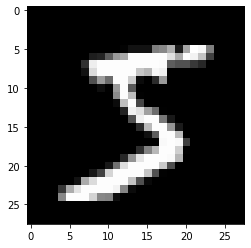

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
# plt.imshow(X_train[1], cmap='gray')
# plt.imshow(X_train[2], cmap='gray')
# plt.imshow(X_train[3], cmap='gray')

(1)번 문제, locality + (2)번 문제 필요없는 연산을 많이 해결

- 해상도 자체가 낮다 (28 by 28).
- 1차원으로 바꿔서 fully connected 해도 이미지가 작기 때문에 locality 를 잃지 않는다.

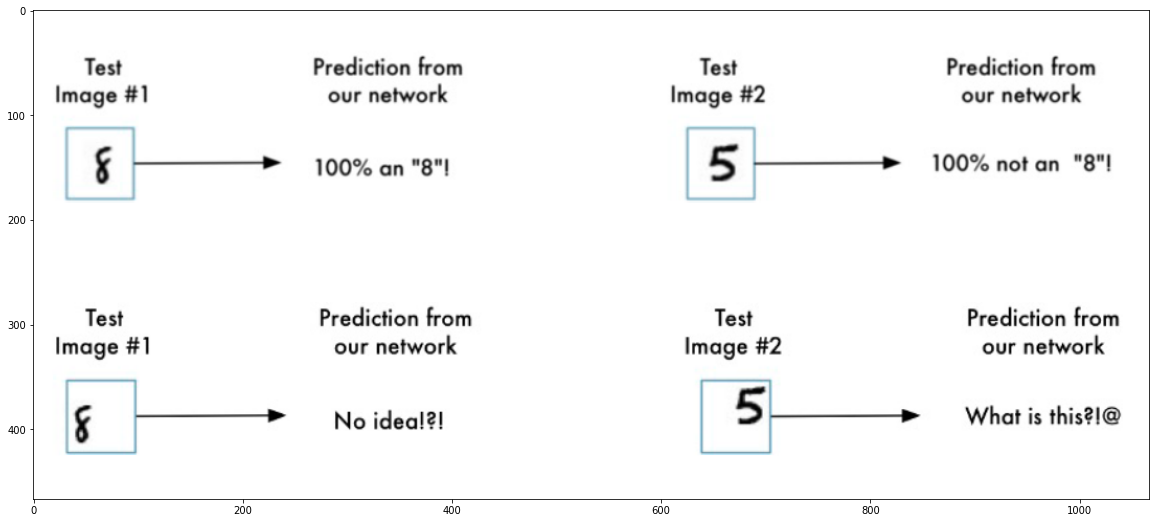

In [28]:
im2 = cv2.imread('NN_8.png')
plt.figure(figsize=(20,10))
plt.imshow(im2)

- 또, 객체가 확실하다. 만약, 객체가 구석에 있다면 인식하지 못한다. (NN 의 한계점)

---

한계점 해결 방법 (1980년대 문제점)
- 학습데이터를 만들 때 부터 이미지를 조작하고 변형해서 학습 데이터를 만든다. => 데이터 증강 

but
- 데이터 양이 너무 많아진다. (80년대 computing power 가 부족) 
- => 원본이 아닌 원본을 대표 할만한 데이터로 바꿔서 사용한다. (더 작은 크기) = featured data

문제 해결을 위해 과거 사용한 기법들
- Histogram of Oriented Gradients (HOG)
- Haar Cascades
- Scale-Invariant Feature Transform (SIFT)
- Speeded Up Robust Feature (SURF)

그 중  
Haar Cascades
- window 방식으로 첫 줄 부터 내려가면서 미리 주어진 연산값들로 (예, 눈코입 과 같은 특징) 이미지에서 눈코입을 찾는다.
- 이미지의 크기가 변하면 찾지 못하는 문제 => window 의 크기를 늘리고 줄이면서 반복
https://youtu.be/hPCTwxF0qf4

---

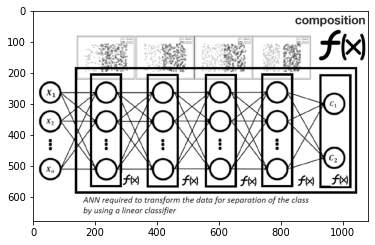

In [30]:
plt.imshow(im1)

## 얀 르쿤(Yann LeCun) - 
- 가정 : 이미지를 특성 형태로 바꾸었더니 NN에 넣었을때 잘 분류가 된다.
- 목표 : 가장 좋은 형태로 이미지를 바꾸자! (특정 형태에서 분류가 잘 됨)

=> 다양한 필터 (corr, conv) 를 사용해 성능이 좋은 필터를 찾아내야 한다.

- 문제점 : 과연 어떤 필터를 사용해야 하나?  

=> perceptron 위치에 convolution 을 배치 한다. (둘 다 1차연산을 하기 때문에 집어 넣을 수 있다.)

- perceptron : 1차 => 1차는 여러번 해도 1차 => 아무리 변해도 ax + b 형태 (1차원)
- 하지만 모델에, non-linear activation function 이 있기 때문에 이미지를 넣었을때 어떠한 형태로도 만들 수 있다.

(Activation Function : 일반적으로 입력 신호의 총합을 출력신호로 변환하는 함수)  
(UAT 이론 (레어가 많을수록 성능이 좋아짐) : linear & non-linear funtion 만 있으면, 모든 함수를 만들 수 있다.)  

feature extractor : 이미지를 집어 넣어서 feature 로 표현된 다른 형태의 데이터로 변환

- 문제1 : 필터 모델(perc 위치에 conv 넣은)에 이미지를 넣으면 결과가 최선일 지는 모른다.
- 문제2 : 초창기에는 filter 를 사람이 정했다.

=> 해결 (얀 르쿤) 
- perc 대신 conv 넣은 모델을 NN 와 붙이려 했다. but 위 모델에서 2~3차 데이터로 결과가 나오는데 NN은 1차 데이터가 들어가야 한다.
- 따라서 모델과 NN 사이에 2~3차 를 1차로 변화 시키는 식을 더해서 모델을 만든다.
- 얀 루큰 모델 : [Filter Extractor (2~3차)] + [1차로 변형] + [NN] => 정답 값

정답 값이 생기면서 역전파(back propagation)를 사용할 수 있게 된다. (모델들을 붙였기 때문에 성능이 좋아졌다. (and to and))
- NN 도 학습 됨과 동시에 filter 도 학습된다.
- LeNet1 (1989)
- 이후 LeNet5(1997) 이 나옴 (현대 CNN(Convolutional Neural Networks) 의 시초)

---

### 정리

1. image data 를 NN 와 같은 ML 모델에 넣으면, dataset 이 1차원 featuer 와 vector 로 들어가야 한다.

2. 문제점 발생 : 이미지가 너무 커져버러서 - 차원의저주, overfitting, locality 손실 등

3. feature 기반으로 (원본의 일부) locality 문제 해결 + 크기가 줄어들며 차원의 저주 해결

4. 이제 어떻게 feature 를 찾는가???

5. 얀 르쿤 - feature를 찾기위해 filter 기법을 사용 (corr, conv)

6. NN 에 perceptron 대신에 filter (conv) 를 넣으면 어떨까?

7. 어떤 이미지가 들어 가면, 다른 형태의 featured data 로 바꿀 수 있을 것이다. 
- conv 도 1차 개념이지만, 선형을 => 비선형 결합 으로 변형 할 수 있다. (2차 or 3차 데이터)
- = feature extraction

---


cnn_histoy (CVPR2012).pdf

CVPR : 전세계 최고의 학회



In [32]:
# tensorflow 에서 locally conneted 지원
import tensorflow as tf

tf.keras.layers.LocallyConnected2D()

---

2022_05_14_24_65_98_656.mp4 

02:50:00 이후 

pdf 필기

---